In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('/content/mobile_ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.shape

(400, 5)

In [7]:
df.drop_duplicates()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


Text(0.5, 1.0, 'Purchased')

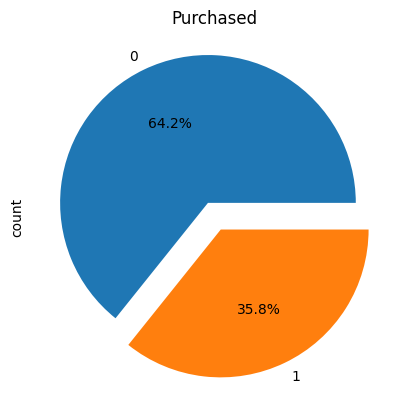

In [12]:
df.Purchased.value_counts().plot.pie( ).set_title('Purchased')

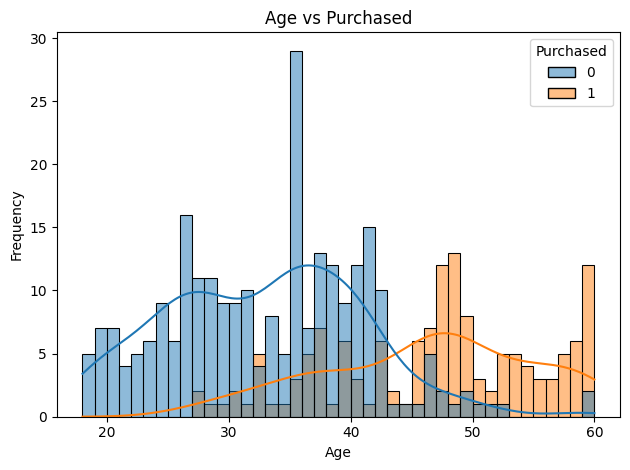

In [17]:
sns.histplot(data=df, x='Age', hue='Purchased',kde=1,binwidth=1)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age vs Purchased')
plt.tight_layout()

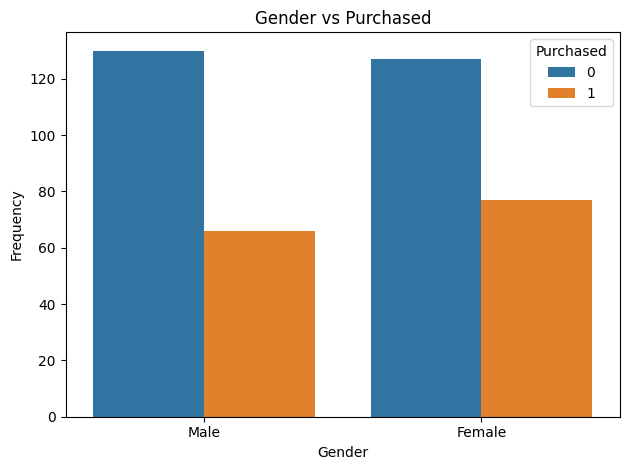

In [19]:
sns.countplot(data=df, x='Gender', hue='Purchased')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Gender vs Purchased')
plt.tight_layout()

In [21]:
from sklearn.preprocessing import LabelEncoder

In [23]:
le = LabelEncoder()
df['Gender_encoded'] = le.fit_transform(df['Gender'])

In [24]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Gender_encoded
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1


In [26]:
df_1 = df.drop(['Gender'], axis=1)

In [29]:
corr = df_1.corr()

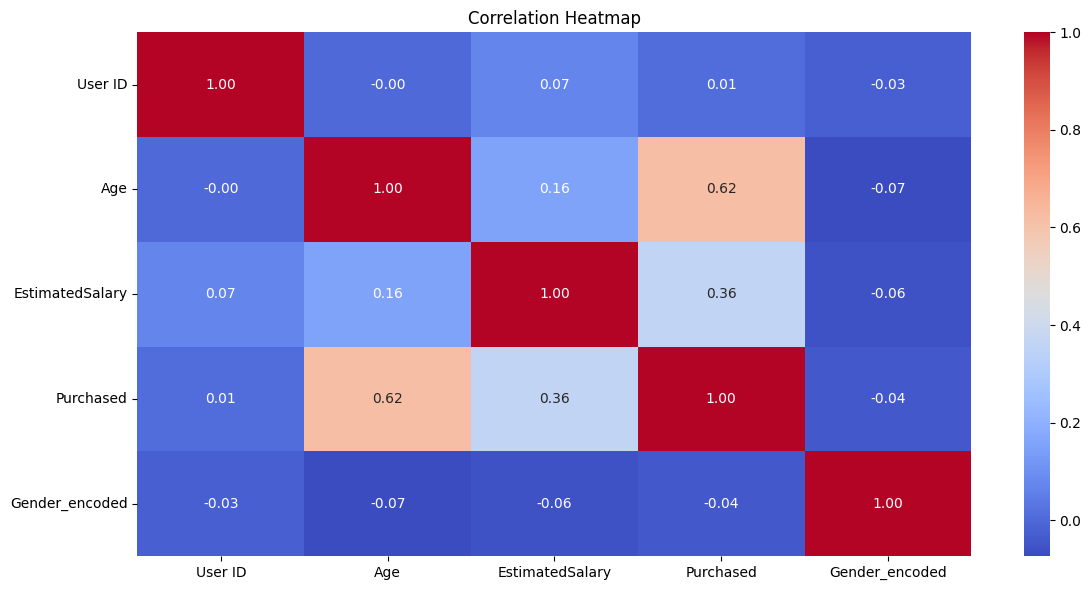

In [34]:
plt.figure(figsize=(12, 6))
sns.heatmap(data=corr,annot=True,cmap='coolwarm',fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import GridSearchCV

In [47]:
def neuralnetwork(X_train, y_train, X_test, y_test):
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  model = Sequential()
  model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
  #model.add(Dense(units=32, activation='relu'))
  model.add(Dense(units=1, activation='sigmoid'))
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
  loss, accuracy = model.evaluate(X_test, y_test)
  print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

In [42]:
def RandomForest(X_train, y_train, X_test, y_test):
  rf = RandomForestClassifier(n_estimators=100, random_state=42)
  rf.fit(X_train, y_train)
  y_pred = rf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(f'Accuracy: {accuracy}')
  print(classification_report(y_test, y_pred))
  print(confusion_matrix(y_test, y_pred))

In [51]:
def xgboost(X_train, y_train, X_test, y_test):
  xgb = XGBClassifier(random_state=42)
  param_grid = {
        'learning_rate': [0.01, 0.1, 0.2],
        'n_estimators': [150, 180, 220],
        'max_depth': [3, 5, 7],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0]
    }
  grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='accuracy', cv=5)
  grid_search.fit(X_train, y_train)
  best_params = grid_search.best_params_
  y_pred = grid_search.best_estimator_.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(f'Accuracy: {accuracy}')
  print(classification_report(y_test, y_pred))
  print(confusion_matrix(y_test, y_pred))
  print(best_params)

In [55]:
X = df.drop(['Purchased','Gender','User ID'], axis=1)
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
neuralnetwork(X_train, y_train, X_test, y_test)
RandomForest(X_train, y_train, X_test, y_test)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.7155 - loss: 0.6409 - val_accuracy: 0.8125 - val_loss: 0.6152
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8474 - loss: 0.5859 - val_accuracy: 0.8438 - val_loss: 0.5623
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8666 - loss: 0.5331 - val_accuracy: 0.8281 - val_loss: 0.5198
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8259 - loss: 0.4931 - val_accuracy: 0.8594 - val_loss: 0.4864
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8366 - loss: 0.4535 - val_accuracy: 0.8594 - val_loss: 0.4578
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8424 - loss: 0.4238 - val_accuracy: 0.8750 - val_loss: 0.4325
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8726 - loss: 0.3781 - val_accuracy: 0.8906 - val_loss: 0.4107
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8641 - loss: 0.3740 - val_accuracy: 0.8750 - val_loss: 0.3896


In [53]:
xgboost(X_train, y_train, X_test, y_test)

Accuracy: 0.9125
              precision    recall  f1-score   support

           0       0.96      0.90      0.93        52
           1       0.84      0.93      0.88        28

    accuracy                           0.91        80
   macro avg       0.90      0.92      0.91        80
weighted avg       0.92      0.91      0.91        80

[[47  5]
 [ 2 26]]
{'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 180, 'subsample': 1.0}
